In [11]:
def data_read_display(filename):
    """ 
	when passed the full filename (path plus filename) of a deep learning dataset
	This function reads the binary data and rescales it
	reforms it from vector into array of the proper size
	rails the data off at suggested maximum and minimum values
	displays the data as grayscale on black background
    """

    import numpy as np
    import matplotlib.pyplot as plt

    dims = (126,201)   # rows, columns

    minmax = [0,30]	# suggested data limits for display purposes
    
    # set minmax = [0,0] to use minimum and maximum of each file (excluding missing data)
    # [0,30] mm/hr is a good range for rainfall

    data = np.fromfile(filename,dtype='int16',count=-1,sep='') # 2 byte integers
    print('size of read vector',len(data))
    data = np.reshape(data,dims)

    if (np.max(data) > 0):

        # scale data to between 0 and 1 then rail off the extremes
        if (minmax[0] > 0 or minmax[1] > 0):
            data = (data - minmax[0])/(minmax[1] - minmax[0])
            data[(data < minmax[0])] = minmax[0]
            data[(data > minmax[1])] = minmax[1]
        else:
            data = (data - np.min(data))/(np.max(data) - np.min(data))

    else:
        print('empty hour!')

    # display image as grayscale
    plt.ion()  # needed if running from command line
    plt.imshow(data, cmap='gray', origin='lower')

    

size of read vector 25326


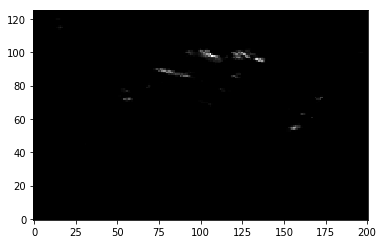

In [13]:
data_read_display("../../../DATA/radar/radar2008/radar.20080601.00.dat")